# Collocational Analysis

"You shall know a word by the company it keeps!" These are the oft-quoted words of the linguist J.R. Firth in describing the meaning and spirit of collocational analysis. Collocation is a linguistic term for co-occuring. While most words have the possibility of co-occuring with most other words at some point in the English language, when there is a significant statistical relationship between two regularly co-occuring words, we can refer to these as collocates. One of the first, and most cited examples of collocational analysis concerns the words `strong` and `powerful`. While both words mean arguably the same thing, it is statistically more common to see the word `strong` co-occur with the word `tea`. Native speakers of English can immediately recognize the familiarity of `strong tea` as opposed to `powerful tea`, even though the two phrases both make sense in their own way (see Halliday, 1966 for more of this discussion). Interestingly, the same associations do not occur with the phrases `strong men` and `powerful men`, although in these instances, both phrases take on slightly different meanings.

These examples highlight the belief of Firthian linguists that the meaning of a word is not confined to the word itself, but in the associations that words have with other co-occuring words. Statistically significant collocates need not be adjacent, just proximal. The patterns of the words in a text, rather than the individual words themselves, have complex, relational units of meaning that allow us to ask questions about the use of lanugage in specific discourses.

In this exercise we will determine the statistical significance of the words that most often co-occur with `privacy` in an attempt to better understand the meaning of the word as it is used in the Hansard Corpus. We will count the actual frequency of the co-occurence, as well as use a number of different statistical tests of probability. These tests will be conducted first on one file from the corpus, then on the entire corpus itself. 

### Part 1: Collocational analysis on one file

This section will determine the statistically significant collocates that accompany the word `privacy` in the file for 2015. Testing file-by-file allows us to track the diachronic (time-based) change and use of the words.

Again, we'll begin by calling on all the <span style="cursor:help;" title="a set of instructions that performs a specific task"><b>functions</b></span> we will need. Remember that the first few sentences are calling on pre-installed <i>Python</i> <span style="cursor:help;" title="packages of functions and code that serve specific purposes"><b>modules</b></span>, and anything with a `def` at the beginning is a custom function built specifically for these exercises. The text in red describes the purpose of the function.

In [1]:
# This is where the modules are imported
import csv
import sys
import codecs
import nltk
import nltk.collocations
import collections
import statistics
from nltk.metrics.spearman import *
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from os import listdir
from os.path import splitext
from os.path import basename
from tabulate import tabulate

# These functions iterate through the directory and create a list of filenames

def list_textfiles(directory):
    "Return a list of filenames ending in '.txt'"
    textfiles = []
    for filename in listdir(directory):
        if filename.endswith(".txt"):
            textfiles.append(directory + "/" + filename)
    return textfiles


def remove_ext(filename):
    "Removes the file extension, such as .txt"
    name, extension = splitext(filename)
    return name


def remove_dir(filepath):
    "Removes the path from the file name"
    name = basename(filepath)
    return name


def get_filename(filepath):
    "Removes the path and file extension from the file name"
    filename = remove_ext(filepath)
    name = remove_dir(filename)
    return name

# This function works on the contents of the files

def read_file(filename):
    "Read the contents of FILENAME and return as a string."
    infile = codecs.open(filename, 'r', 'utf-8')
    contents = infile.read()
    infile.close()
    return contents

Collocational analysis is a frequency-based technique that uses word counts to determine significance. One of the problems with counting word frequencies, as we have seen in other sections, is that the most frequently occuring words in English are function words, like `the`, `of`, and `and`. For this reason, it is neccessary to remove these words in order to obtain meaningful results. In text analysis, these high frequency words are compiled into lists called `stopwords`. While standard stopword lists are provided by the `NLTK` module, for the Hansard Corpus it was necessary to remove other kinds of words, like proper nouns (names and place names), and other words common to parliamentary proceedings (like Prime Minister, Speaker, etc.). These words, along with the standard stopwords, can be seen below.

Here, we use our `read_file` function to read in a text file of custom stopwords, assigning the variable `customStopwords`. We tokenize the list using the `split` function and then create a variable called `hansardStopwords` that incorporates the `NLTK` stopword list, and adding the words from `customStopwords` if they don't already occur in the `NLTK` list.

In [2]:
stopwords = read_file('HansardStopwords.txt')
customStopwords = stopwords.split()

#default stopwords with custom words added
hansardStopwords = nltk.corpus.stopwords.words('english') 
hansardStopwords += customStopwords

In [3]:
print(hansardStopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

Now, we use `read_file` to load the contents of the file for 2015. For consistency and to avoid file duplication, we're always reading the files from the same directory. Even though it was used for other sections, the data is the same. We read the contents of the text file, then remove the case and punctuation from the text, split the words into a list of tokens, and assign the words in each file to a list with the variable name `text`. What's new here, compared to other sections, is the additional removal of stopwords.

In [4]:
# opens, reads, and tokenizes the file
text = read_file('data/2015.txt')
words = text.split()
clean = [w.lower() for w in words if w.isalpha()]
# removes stopwords
text = [w for w in clean if w not in hansardStopwords]

Another type of processing required for the generation of accurate collocational statistics is called lemmatization. In linguistics, a lemma is the grammatical base or stem of a word. For example, the word `protect` is the lemma of the verbs `protecting` and `protected`, while `ethic` is the lemma of the noun `ethics`. When we lemmatize a text, we are removing the grammatical inflections of the word forms (like `ing` or `ed`). The purpose of lemmatization for the Hansard Corpus is to obtain more accurate statistics for collocation by avoiding multiple entries for similar but different word forms (like protecting, protected, and protect). For the purpose of this text analysis, I have decided to lemmatize only the nouns and verbs in the Hansard Corpus, as the word `privacy` is not easily modified by adjectives (or at all by adverbs). 

The lemmatizer I have used for this project was developed by Princeton and is called <a href="http://wordnetweb.princeton.edu/perl/webwn" target="_blank">WordNet</a>. Lemmas and their grammatical inflections can be searched using their web interface. 

In the code below, I load the WordNetLemmatizer (another function included in the `NLTK` module) into the variable `wnl`. Then, I iterate through the text, first lematizing the verbs (shown as `v`), then the nouns (shown as `n`). Unfortunately, the WordNet function only takes one argument, so this code requires two pass-throughs of the text. I'm sure there is a more elegant way to construct this code, though I've not found it yet. This is another reason why I've decided only to lemmatize verbs and nouns, rather than including adjectives and adverbs.

In [5]:
# creates a variable for the lemmatizing function
wnl = WordNetLemmatizer()

# lemmatizes all of the verbs
lemm = []
for word in text:
    lemm.append(wnl.lemmatize(word, 'v'))

# lemmatizes all of the nouns 
lems = []
for word in lemm:
    lems.append(wnl.lemmatize(word, 'n'))

We need to make sure that the lemmatizer did something. Since we've only lemmatized for nouns and verbs, we check that here against the unlemmatized corpus, where `text` has not been lemmatized and `lems` has. Below we see that noun `ethics` appears <u>156 times</u> in the `text` variable and <u>0 times</u> in the `lems` variable. But the lemma for `ethics`: `ethic`, remains in the `lems` variable for a frequency of <u>161 times</u>. Similar values are repeated for the verb and variations of `protect`.

In [6]:
print('NOUNS')
print('ethics:', text.count('ethics'))
print('ethics:', lems.count('ethics'))
print('ethic:', lems.count('ethic'))
print('\n')
print('VERBS')
print('protecting:', text.count('protecting'))
print('protecting:', lems.count('protecting'))
print('protected:', text.count('protected'))
print('protected:', lems.count('protected'))
print('protect:', lems.count('protect'))

NOUNS
ethics: 156
ethics: 0
ethic: 161


VERBS
protecting: 737
protecting: 0
protected: 268
protected: 0
protect: 3401


Here we check that the lemmatizer hasn't been over-zealous by determining the frequency for `privacy` before and after the lemmatizing function. The frequencies are the same, meaning we've not lost anything in the lemmatization.

In [7]:
print('privacy:', text.count('privacy'))
print('privacy:', lems.count('privacy'))

privacy: 806
privacy: 806


#### Part 1.1: Unfocused Bigram Search

Let's clarify some of the words we will be using in the rest of this exercise:
- `ngram` = catch-all term for multiple word occurences
- `bigram` = word pairs
- `trigram` = three-word phrases

After the stopwords have been removed and the nouns and verbs lemmatized, we are ready to determine statistics for co-occuring words, or collocates. Any collocational test requires four pieces of data: the length of the text in which the words appear, the number of times the words both seperately appear in the text, and the number of times the words occur together.

Before we focus our search on the word `privacy`, we will determine the 10 most commonly occuring bigrams (based on frequency) in the 2015 Hansard Corpus. 

In this code we assign the `lems` variable to `colText` by adding the `nltk.Text` functionality. We can then use the `NLTK` function `collocations` to determine (in this case) the 10 most common bigrams. Changing the number in the brackets will change the number of results returned.

In [8]:
# prints the 10 most common bigrams
colText = nltk.Text(lems)
colText.collocations(10) 

small business; child care; supreme court; criminal code; action plan;
employment social; health care; foreign affair; social development;
spinal cord


For reference, I ran an earlier test that shows the 10 most common bigrams without the stopwords removed. Duplicating this test only requires that stopwords not be removed as the text is being tokenized and cleaned. We can see that there is a clear difference in the types of results returned with and without stopwords applied. The list of words appearing above is much more interesting in terms of discourse analysis, when functional parliamentary phrases like Prime Minister and Parliamentary Secretary have been removed.

Here is a piece of code that shows how the ngram function works. It goes word by word through the text, pairing each word with the one that came before. That's why the last word in the first word pair becomes the first in the next word pair.

We assign our `colText` variable to the `colBigrams` variable by specifiying that we want to make a list of ngrams containing 2 words. We could obtain trigrams by changing the 2 in the first line of code to a 3. Then, in the second line of code, we display the first 5 results of the `colBigrams` variable with :5. We could display the first 10 by changing the number in the square brackets to :10, or show the top 10 results again by removing the colon. 

In [9]:
# creates a list of bigrams (ngrams of 2), printing the first 5
colBigrams = list(nltk.ngrams(colText, 2)) 
colBigrams[:5] 

[('official', 'report'),
 ('report', 'debate'),
 ('debate', 'volume'),
 ('volume', 'number'),
 ('number', 'session')]

Here we will check to make sure we've the bigram function has gone through and counted the entire text. Having one less ngram is correct because of the way in which the ngrams are generated word-by-word in the test above.

In [10]:
print("Number of words:", len(lems))
print("Number of bigrams:", len(colBigrams))

Number of words: 1361982
Number of bigrams: 1361981


#### Part 1.2: Focused Bigram Search

In this section we will focus our search on bigrams that contain the word `privacy`. First, we'll load the bigram tests from the `NLTK` module, then, we will create a filter that only searches for bigrams containing `privacy`. To search for bigrams containing other words, the word `privacy` in the second line of code can be changed to something else.

In [11]:
# loads bigram code from NLTK
bigram_measures = nltk.collocations.BigramAssocMeasures()

# ngrams with 'privacy' as a member
privacy_filter = lambda *w: 'privacy' not in w

Next, we will load our lemmatized corpus into the bigram collocation finder, apply a frequency filter that only considers bigrams that appear four or more times, and then apply our privacy filter to the results. The variable `finder` now contains a list of all the bigrams containing `privacy` that occur four or more times.

In [12]:
# bigrams
finder = BigramCollocationFinder.from_words(lems)
# only bigrams that appear 4+ times
finder.apply_freq_filter(4)
# only bigrams that contain 'privacy'
finder.apply_ngram_filter(privacy_filter)

##### Distribution

Before I describe the statistical tests that we will use to determine the collocates for `privacy`, it is important to briefly discuss distribution. The chart below maps the distribution of the top 25 terms in the 2015 file.  

This is important because some of the tests assume a normal distribution of words in the text. A normal distribution means that the majority of the words occur a majority of the time; it is represented in statistics as a bell curve. This means that 68% of the words would occur within one standard deviation of the mean (or average frequency of each word in the text), 95% within two standard deviations, and 99.7 within three standard deviations. 

What this means, is that tests that assume a normal distribution will work, but have inaccurate statistics to back them up. I've chosen to describe all of the collocational tests here as a matter of instruction and description, but it's important to understand the tests and what they assume before making research claims based on their results.

The code below calls on the `NLTK` function `FreqDist`. The function calculates the frequency of all the words in the variable and charts them in order from highest to lowest. Here I've only requested the first 25, though more or less can be displayed by changing the number in the brackets. Additionally, in order to have the chart displayed inline (and not as a popup), I've called the <i>magic</i> function `matplotlib inline`. <i>iPython</i> magic functions are identifable by the <b>%</b> symbol.

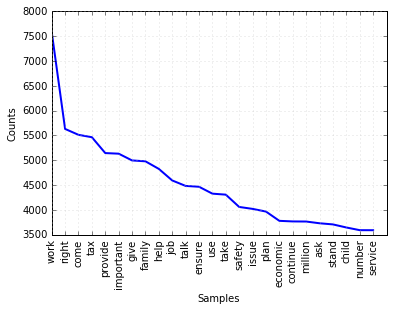

In [13]:
%matplotlib inline
fd = nltk.FreqDist(colText)
fd.plot(25)

As we can see from the chart above, `work` is the highest frequency word in our lemmatized corpus with stopwords applied, followed by `right`. The word `privacy` does not even occur in the list. The code below calculates the frequency and percentage of times these words occur in the text. While `work` makes up 0.56% of the total words in the text, `privacy` accounts for only 0.06%.

In [14]:
print('privacy:',fd['privacy'], 'times or','{:.2%}'.format(float(colText.count("privacy"))/(len(colText))))
print('right:',fd['right'], 'times or','{:.2%}'.format(float(colText.count("right"))/(len(colText))))
print('work:',fd['work'], 'times or','{:.2%}'.format(float(colText.count("work")/(len(colText)))))

privacy: 806 times or 0.06%
right: 5632 times or 0.41%
work: 7588 times or 0.56%


To calculate the mean, and standard deviation, we must count the frequency of all the words in the text and append those values to a list. Since the numbers in the list will actually be represented as text (not as integers), we must add an extra line of code to map those values so they can be used mathematically, calling on the `map` function.

In [15]:
fdnums = []
for sample in fd:
    fdnums.append(fd[sample])
numlist = list(map(int, fdnums))

In [16]:
print("Total of unique words:", len(numlist))
print("Total of words that appear only once:", len(fd.hapaxes()))
print("Percentage of words that appear only once:",'{:.2%}'.format(len(fd.hapaxes())/len(numlist)))

Total of unique words: 18912
Total of words that appear only once: 5847
Percentage of words that appear only once: 30.92%


Once we have our numbers in a list, as the variable `numlist`, we can use the built in `statistics` library for our calculations. Below we've calculated the mean, standard deviation, and the variance. 

These numbers prove that the numerical data has a non-normal distribution. The mean is relatively low, compared to the highest frequency word, `work`, which appears a total of <u>7588</u> times. 

The low mean is due to the high number of low frequency words; there are <u>5847</u> words that appear only once, totalling 30% of the unique words in the entire set. The standard deviation is higher than the mean, which predicts a high variance of numbers in the set, something that is proven by the variance calculation. A large variance shows that the numbers in the set are far apart from the mean, and each other.

In [17]:
datamean = statistics.mean(numlist)
print("Mean:", '{:.2f}'.format(statistics.mean(numlist)))
print("Standard Deviation:", '{:.2f}'.format(statistics.pstdev(numlist,datamean)))
print("Variance:", '{:.2f}'.format(statistics.pvariance(numlist,datamean)))

Mean: 72.02
Standard Deviation: 300.24
Variance: 90144.28


### Statistics 

##### Raw Frequency
The frequency calculations determine both the actual number of occurences of the bigram in the corpus as well as the number of times the bigram occurs relative to the text as a whole (expressed as a percentage).

##### Student's-T 
The Student's T-Score, also called the T-Score, measures the <b>confidence</b> of a claim of collocation and assigns a score based on that certainty. It is computed by subtracting the expected frequency of the bigram by the observed frequency of the bigram, and then dividing the result by the standard deviation which is calculated based on the overall size of the corpus. 

The benefit of using the T-Score is that it considers the evidence for collocates based on the overall amount of evidence provided by the size of the corpus. This differs from the PMI score (described below) which only considers strength based on relative frequencies. The drawbacks to the T-Score include its reliance on a normal distribution (due to the incorporation of standard deviation in the calculation), as well as its dependence on the overall size of the corpus. T-scores can't be compared across corpora of different sizes.

##### Pointwise Mutual Information 
The Pointwise Mutual Information Score (known as PMI or MI) measures the <b>strength</b> of a collocation and assigns it a score. It is a probability-based calculation that compares the number of actual bigrams to the expected number of bigrams based on the relative frequency counts of the words. The test compares the expected figure to the observed figure, converting the difference to a number indicating the strength of the collocation.

The benefit of using PMI is that the value of the score is not dependent on the overall size of the corpus, meaning that PMI scores can be compared across corpora of different sizes, unlike the T-score (described above).
The drawback to the PMI is that it tends to give high scores to low frequency words when they occur most often in the proximity another word.

##### Chi-square 
The Chi-square (or x<sup>2</sup>) measures the observed and expected frequencies of bigrams and assigns a score based on the amount of difference between the two using the standard deviation. The Chi-square is another test that relies on a normal distribution.

The Chi-square shares the benefit of the T-score in taking into account the overall size of the corpus. The drawback of the Chi-square is that it doesn't do well with sparse data. This means that low-frequency (but significant) bigrams may not be represented very well, unlike the scores assigned by the PMI.

##### Log-Likelihood Ratio
The Log-likelihood ratio calculates the size and significance between the observed and expected frequencies of bigrams and assigns a score based on the result, taking into account the overall size of the corpus. The larger the difference between the observed and expected, the higher the score, and the more statistically significant the collocate is. 

The Log-likelihood ratio is my preferred test for collocates because it does not rely on a normal distribution, and for this reason, it can account for sparse or low frequency bigrams (unlike the Chi-square). But unlike the PMI, it does not over-represent low frequency bigrams with inflated scores, as the test is only reporting how much more likely it is that the frequencies are different than they are the same. The drawback to the Log-likelihood ratio, much like the t-score, is that it cannot be used to compare scores across corpora.


-----

The following code filters the results of the focused bigram search based on the statistical tests as described above, assigning the results to a new variable based on the test.

In [18]:
# filter results based on statistical test

# calulates the raw frequency as an actual number and percentage of total words
act = finder.ngram_fd.items()
raw = finder.score_ngrams(bigram_measures.raw_freq)
# student's - t score
tm = finder.score_ngrams(bigram_measures.student_t)
# pointwise mutual information score
pm = finder.score_ngrams(bigram_measures.pmi)
# chi-square score
ch = finder.score_ngrams(bigram_measures.chi_sq)
# log-likelihood ratio
log = finder.score_ngrams(bigram_measures.likelihood_ratio)

Below are the results for the Log-likelihood test. The bigrams are sorted in order of significance, and the order of the words in the word-pairs shows their placement in the text. This means that the most significant bigram in the Log-likelihood test contained the words `digital privacy`, in that order. The word `digital` appears later on in the list with a lower score when it occurs after the word `privacy`. Scores above 3.8 are considered to be significant for the Log-likelihood test.

In [19]:
print(log)

[(('digital', 'privacy'), 1396.7176484665242), (('protect', 'privacy'), 215.8213968026119), (('privacy', 'ethic'), 155.35028599292028), (('access', 'privacy'), 126.05409003413976), (('privacy', 'right'), 93.24869199688817), (('privacy', 'protection'), 85.02469784716251), (('expectation', 'privacy'), 76.10335769327762), (('information', 'privacy'), 69.59199200288319), (('privacy', 'digital'), 56.657303415651356), (('protection', 'privacy'), 49.93335470726988), (('privacy', 'personal'), 48.402130602599286), (('respect', 'privacy'), 44.06965766960184), (('online', 'privacy'), 42.64245113742946), (('privacy', 'privacy'), 42.03746458118176), (('privacy', 'organization'), 39.70209960771831), (('sector', 'privacy'), 38.1170863577707), (('privacy', 'express'), 35.45600258359461), (('privacy', 'greatly'), 34.76347150169757), (('privacy', 'auditor'), 34.69326636806207), (('breach', 'privacy'), 27.595466396858995), (('right', 'privacy'), 25.095042430293038), (('give', 'privacy'), 24.8397269309332

Let's display this data as a table, and remove some of the extra decimal digits. Using the tabulate module, we call the variable `log`, set the table heading names (displayed in red), and set the number of decimal digits to 3 (indicated by `floatfmt=".3f"`), with the numbers aligned on the leftmost digit.

In [20]:
print(tabulate(log, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate                      Log-Likelihood
-----------------------------  ----------------
('digital', 'privacy')         1396.718
('protect', 'privacy')         215.821
('privacy', 'ethic')           155.350
('access', 'privacy')          126.054
('privacy', 'right')           93.249
('privacy', 'protection')      85.025
('expectation', 'privacy')     76.103
('information', 'privacy')     69.592
('privacy', 'digital')         56.657
('protection', 'privacy')      49.933
('privacy', 'personal')        48.402
('respect', 'privacy')         44.070
('online', 'privacy')          42.642
('privacy', 'privacy')         42.037
('privacy', 'organization')    39.702
('sector', 'privacy')          38.117
('privacy', 'express')         35.456
('privacy', 'greatly')         34.763
('privacy', 'auditor')         34.693
('breach', 'privacy')          27.595
('right', 'privacy')           25.095
('give', 'privacy')            24.840
('privacy', 'principle')       22.051
('apply', 'privacy')       

Here we print the results of this table to a CSV file.

In [21]:
with open('2015CompleteLog.csv','w') as f:
    w = csv.writer(f)
    w.writerows(log)

While the table above is nice, it isn't formated exactly the way it could be, especially since we already know that privacy is one half of the bigram. I want to format the list so I can do some further processing in some spreadsheet software, including combining the scores of the bigrams (like `digital privacy` and `privacy digital`) so I can have one score for each word.

The code below sorts the lists generated by each test by the first word in the bigram, appending them to a dictionary called `prefix_keys`, where each word is a key and the score is the value. Then, we sort the keys by the value with the highest score, and assign the new list to a new variable where we obscure the keys containing the word `privacy`. This code must be repeated for each test. 

For the purposes of this analysis, we will only output the two frequency tests and the Log-likelihood test.

In [22]:
##################################################################
################ sorts list of ACTUAL frequencies ################
##################################################################

# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, a in act:
    # first word
    prefix_keys[key[0]].append((key[1], a))
     # second word
    prefix_keys[key[1]].append((key[0], a))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

# remove the word privacy and display the first 50 results
actkeys = prefix_keys['privacy'][:50]

##################################################################
#### sorts list of RAW (expressed as percentage) frequencies #####
##################################################################

# group bigrams by first and second word in bigram                                         
prefix_keys = collections.defaultdict(list)
for key, r in raw:
    # first word
    prefix_keys[key[0]].append((key[1], r))
    # second word
    prefix_keys[key[1]].append((key[0], r))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

rawkeys = prefix_keys['privacy'][:50]

##################################################################
############### sorts list of log-likelihood scores ##############
##################################################################

# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, l in log:
    # first word
    prefix_keys[key[0]].append((key[1], l))
    # second word
    prefix_keys[key[1]].append((key[0], l))
    
# sort bigrams by strongest association                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

logkeys = prefix_keys['privacy'][:50]

Let's take a look at the new list of scores for the Log-likelihood test, with the word `privacy` removed. Nothing has changed here except the formatting.

In [23]:
from tabulate import tabulate
print(tabulate(logkeys, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate       Log-Likelihood
--------------  ----------------
digital         1396.718
protect         215.821
ethic           155.350
access          126.054
right           93.249
protection      85.025
expectation     76.103
information     69.592
digital         56.657
protection      49.933
personal        48.402
respect         44.070
online          42.642
privacy         42.037
privacy         42.037
organization    39.702
sector          38.117
express         35.456
greatly         34.763
auditor         34.693
breach          27.595
right           25.095
give            24.840
principle       22.051
apply           20.995
enforce         19.928
power           19.527
violation       19.435
consult         17.652
information     16.246
strengthen      15.369
power           15.078
loss            14.812
law             14.792
legislation     14.304
security        12.767
appear          12.603
consult         12.461
ensure          11.980
data            11.907
practice   

Again, just for reference, these are the 25 top Log-Likelhood scores for 2015 without the stopwords applied.

Here we will write the sorted results of the tests to a CSV file. 

In [24]:
with open('2015collocate_Act.csv','w') as f:
    w = csv.writer(f)
    w.writerows(actkeys)

with open('2015collocate_Raw.csv','w') as f:
    w = csv.writer(f)
    w.writerows(rawkeys)
    
with open('2015collocate_Log.csv','w') as f:
    w = csv.writer(f)
    w.writerows(logkeys)

What is immediately apparent from the Log-likelihood scores is that there are distinct types of words that co-occur with the word privacy. The top 10 most frequently co-occuring words are digital, protect, ethic, access, right, protection, expectation, and information. Based on this list alone, we can deduce that privacy in the Hansard corpus is a serious topic; one that is concerned with ethics and rights, which are things commonly associated with the law. We can also see that privacy has both a digital and an informational aspect, which are things that have an expectation of both access and protection. 

While it may seem obvious that these kinds of words would co-occur with privacy, we now have statistical evidence upon which to build our claim. 

-----

### Part 2: Reading the whole corpus

Here we repeat the above code, only instead of using one file, we will combine all of the files to obtain the scores for the entire corpus.

In [25]:
corpus = []
for filename in list_textfiles('data'):
    text_2 = read_file(filename)
    words_2 = text_2.split()
    clean_2 = [w.lower() for w in words_2 if w.isalpha()]
    text_2 = [w for w in clean_2 if w not in hansardStopwords]
    corpus.append(text_2)

In [26]:
lemm_2 = []
for doc in corpus:
    for word in doc:
        lemm_2.append(wnl.lemmatize(word, 'v'))
lems_2 = []
for word in lemm_2:
    lems_2.append(wnl.lemmatize(word, 'n'))

In [27]:
# prints the 10 most common multi-word pairs (n-grams)
colText_2 = nltk.Text(lems_2)
colText_2.collocations(10) 

employment insurance; free trade; human right; criminal code; unite
state; foreign affair; greenhouse gas; supreme court; economic
development; health care


In [28]:
# bigrams
finder_2 = BigramCollocationFinder.from_words(lems_2)
# only bigrams that appear 4+ times
finder_2.apply_freq_filter(4)
# only bigrams that contain 'privacy'
finder_2.apply_ngram_filter(privacy_filter)

In [29]:
# filter results based on statistical test
act_2 = finder_2.ngram_fd.items()
raw_2 = finder_2.score_ngrams(bigram_measures.raw_freq)
log_2 = finder_2.score_ngrams(bigram_measures.likelihood_ratio)

In [30]:
##################################################################
################ sorts list of ACTUAL frequencies ################
##################################################################

# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, a in act_2:
    # first word
    prefix_keys[key[0]].append((key[1], a))
     # second word
    prefix_keys[key[1]].append((key[0], a))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

# remove the word privacy and display the first 50 results
actkeys_2 = prefix_keys['privacy'][:50]

##################################################################
#### sorts list of RAW (expressed as percentage) frequencies #####
##################################################################

# group bigrams by first and second word in bigram                                         
prefix_keys = collections.defaultdict(list)
for key, r in raw_2:
    # first word
    prefix_keys[key[0]].append((key[1], r))
    # second word
    prefix_keys[key[1]].append((key[0], r))
    
# sort keyed bigrams by strongest association.                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

rawkeys_2 = prefix_keys['privacy'][:50]

##################################################################
############### sorts list of log-likelihood scores ##############
##################################################################

# group bigrams by first and second word in bigram                                        
prefix_keys = collections.defaultdict(list)
for key, l in log_2:
    # first word
    prefix_keys[key[0]].append((key[1], l))
    # second word
    prefix_keys[key[1]].append((key[0], l))
    
# sort bigrams by strongest association                                  
for key in prefix_keys:
    prefix_keys[key].sort(key = lambda x: -x[1])

logkeys_2 = prefix_keys['privacy'][:50]

In [31]:
from tabulate import tabulate
print(tabulate(logkeys_2, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate        Log-Likelihood
---------------  ----------------
access           5110.393
ethic            5107.996
digital          1920.924
protect          1839.608
right            1229.061
information      1062.382
invasion         904.061
privacy          553.362
privacy          553.362
protection       476.078
breach           444.387
breach           376.297
respect          350.245
right            349.423
personal         345.511
violation        313.199
violate          306.068
protection       275.448
personal         253.184
invade           246.280
expectation      237.897
concern          215.959
issue            207.534
law              204.353
information      192.077
ensure           190.866
concern          174.224
online           135.406
competition      129.990
intrude          110.100
civil            108.547
csec             100.214
balance          98.426
confidentiality  90.763
digital          90.598
safeguard        89.725
intrusion        84.955
routine 

In [32]:
with open('Allcollocate_Act.csv','w') as f:
    w = csv.writer(f)
    w.writerows(actkeys_2)

with open('Allcollocate_Raw.csv','w') as f:
    w = csv.writer(f)
    w.writerows(rawkeys_2)
    
with open('Allcollocate_Log.csv','w') as f:
    w = csv.writer(f)
    w.writerows(logkeys_2)

The processed spreadsheet including the cumulative scores for all the bigrams for each test for every year and Parliament can be accessed here: <a href="HansardCollocationTable.xlsx" target=blank>Hansard Collocation Table</a>. If you plan to use the data, please cite appropriately.